In [137]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 데이터 분할
from sklearn.model_selection import train_test_split


from sklearn.metrics import f1_score, roc_curve, auc, precision_score, recall_score
import matplotlib.pyplot as plt
import os

# confusion matrix
from sklearn.metrics import confusion_matrix

import numpy as np

In [6]:
matplotlib.rc("font", family="NanumGothic")
plt.rcParams['axes.unicode_minus']=False
os.environ['PATH']+=os.pathsep+"~/anaconda3/lib/python3.7/site-packages"

In [4]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
matplotlib.rc("font", family="NanumGothic")
plt.rcParams['axes.unicode_minus']=False
os.environ['PATH']+=os.pathsep+"~/anaconda3/lib/python3.7/site-packages"

In [7]:
df = pd.read_csv("../data/BigData/HMEQ.csv")
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [8]:
# JOB의 결측치를 "Othre"로 대체
df['JOB'].fillna("Other", inplace=True)

# 다른 결측치의 경우 평균으로 대체
df.fillna(df.mean(), inplace=True)

In [9]:
df_raw_dummy = pd.get_dummies(df)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [10]:
df_x=df_raw_dummy.drop("BAD", axis=1)
df_y=df_raw_dummy['BAD']

In [14]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size=0.3, random_state=1234)
print("train size is {}".format(df_train_x.shape))
print("test size is {}".format(df_test_x.shape))

print("test size is {}".format(df_test_y.shape))

train size is (2623, 18)
test size is (1125, 18)
test size is (1125,)


In [115]:
model =['DecisionTree', 'RandomForest','GradientBoosing']

train_accuracy=[]; test_accuracy=[]
model_f1_score=[]; model_precision_score=[]; model_recall_score=[]
model_auc_score=[]

In [116]:
# DecisionTree
tree_final = DecisionTreeClassifier(max_depth=1, min_samples_split=20,
                                   min_samples_leaf=8, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

y_pred = tree_final.predict(df_test_x)

print("="*5, "DecisionTree", "="*5)
print("Accuracy:{0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix :\n{}".format(confusion_matrix(df_test_y, y_pred)))

train_accuracy.append(tree_final.score(df_train_x, df_train_y))
test_accuracy.append(tree_final.score(df_test_x, df_test_y))

fpr, tpr, thresholds =roc_curve(df_test_y, y_pred)
roc_auc=auc(fpr, tpr)

model_auc_score.append(roc_auc)

===== DecisionTree =====
Accuracy:0.924

Confusion matrix :
[[1020    1]
 [  84   20]]


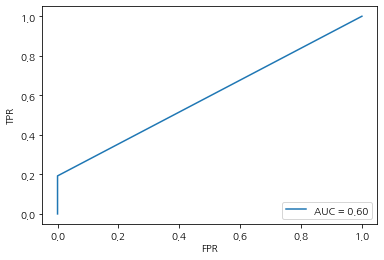

In [130]:
plt.plot(fpr,tpr,label="AUC = %0.2f"%roc_auc)
plt.legend(loc='lower right')
plt.ylabel("TPR"); plt.xlabel("FPR")
plt.show()

AUC가 둥글게 나와야 좋은 모델이다! (면적으로 계산하게되는데 직선으로 나오면 ROC랑 겹치게 된다!)

In [118]:
#f1 스코어
model_f1_score.append(f1_score(df_test_y, y_pred))
model_precision_score.append(precision_score(df_test_y, y_pred))
model_recall_score.append(recall_score(df_test_y, y_pred))

In [119]:
#RandomForest
rf_final = RandomForestClassifier(n_estimators=100,max_depth=4, min_samples_split=70,
                                   min_samples_leaf=20, random_state=1234)
rf_final.fit(df_train_x, df_train_y)

y_pred = rf_final.predict(df_test_x)

print("="*5, "RandomForest", "="*5)
print("Accuracy on training set : {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

print("Confusion matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)))


train_accuracy.append(rf_final.score(df_train_x, df_train_y))
test_accuracy.append(rf_final.score(df_test_x, df_test_y))

fpr, tpr, thresholds =roc_curve(df_test_y, y_pred)
roc_auc=auc(fpr, tpr)

model_auc_score.append(roc_auc)

===== RandomForest =====
Accuracy on training set : 0.927
Accuracy on test set : 0.925
Confusion matrix : 
[[1021    0]
 [  84   20]]


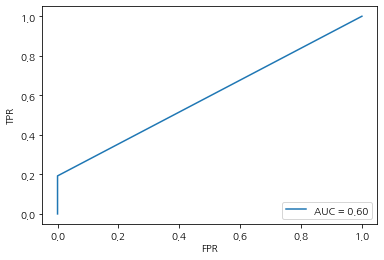

In [128]:
plt.plot(fpr,tpr,label="AUC = %0.2f"%roc_auc)
plt.legend(loc='lower right')
plt.ylabel("TPR"); plt.xlabel("FPR")
plt.show()

In [121]:
#f1 스코어
model_f1_score.append(f1_score(df_test_y, y_pred))
model_precision_score.append(precision_score(df_test_y, y_pred))
model_recall_score.append(recall_score(df_test_y, y_pred))

In [122]:

#Gradient Boosting
gb_final = GradientBoostingClassifier(learning_rate=1, n_estimators=100,max_depth=4, min_samples_split=60,
                                   min_samples_leaf=1, random_state=1234)
gb_final.fit(df_train_x, df_train_y)

y_pred = rf_final.predict(df_test_x)

print("="*5, "Gradient Boosting", "="*5)
print("Accuracy on training set : {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

print("Confusion matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)))
train_accuracy.append(gb_final.score(df_train_x, df_train_y))
test_accuracy.append(gb_final.score(df_test_x, df_test_y))

fpr, tpr, thresholds =roc_curve(df_test_y, y_pred)
roc_auc=auc(fpr, tpr)

model_auc_score.append(roc_auc)

===== Gradient Boosting =====
Accuracy on training set : 0.938
Accuracy on test set : 0.905
Confusion matrix : 
[[1021    0]
 [  84   20]]


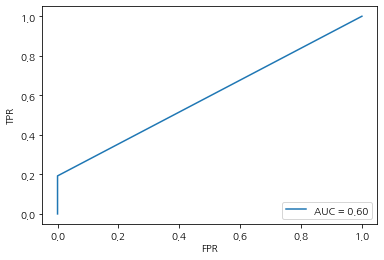

In [131]:
plt.plot(fpr,tpr,label="AUC = %0.2f"%roc_auc)
plt.legend(loc='lower right')
plt.ylabel("TPR"); plt.xlabel("FPR")
plt.show()

In [124]:
#f1 스코어
model_f1_score.append(f1_score(df_test_y, y_pred))
model_precision_score.append(precision_score(df_test_y, y_pred))
model_recall_score.append(recall_score(df_test_y, y_pred))

In [125]:
df_eval = pd.DataFrame(index=model)
df_eval['Train Accuracy']=train_accuracy
df_eval['Test Accuracy']=test_accuracy
df_eval['F1 Score']=model_f1_score
df_eval['AUC']=model_auc_score
df_eval['Precision Score']=model_precision_score
df_eval['Recall Score']=model_recall_score
df_eval.round(3)

,Train Accuracy,Test Accuracy,F1 Score,AUC,Precision Score,Recall Score
DecisionTree,0.926,0.924,0.320,0.596,0.952,0.192
RandomForest,0.927,0.925,0.323,0.596,1.000,0.192
GradientBoosing,0.938,0.905,0.323,0.596,1.000,0.192


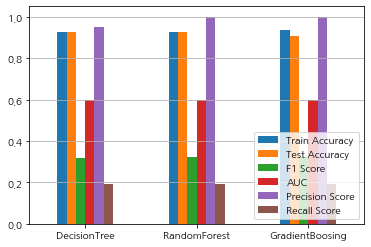

In [126]:
df_eval.plot.bar(rot=0)
plt.legend(loc='lower right')
plt.grid(axis='y')

    GradeintBoosting이 가장 높은 정확도와 F1 Score, AUCfmf qhdla
    GradientBoosting > DecisionTree > RandomForest

# 실습

In [132]:
df_raw = pd.read_csv("../data/BigData/통신고객이탈.csv", engine = "python", encoding = "EUC-KR")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [133]:
# 데이터 전처리 - 결측치 처리
df_raw.isnull().sum(axis = 0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

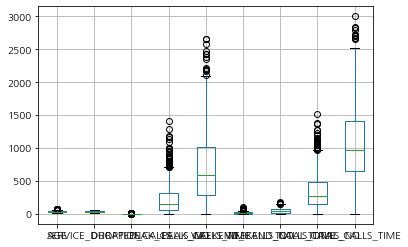

In [134]:
df_raw.boxplot()

범주형 데이터 바꾸기

In [138]:
df_raw["CHURN"] = np.where(df_raw["CHURN"] == "Active", 0, 1)
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


#### 데이터 분리

In [139]:
# 데이터 전처리 - 데이터 분할
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234)
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (651, 15)
test data size : (279, 15)


In [154]:
model =['DecisionTree', 'RandomForest','GradientBoosing']

train_accuracy=[]; test_accuracy=[]
model_f1_score=[]; model_precision_score=[]; model_recall_score=[]
model_auc_score=[]

In [155]:
tree_final = DecisionTreeClassifier(max_depth=4, min_samples_split=20,
                                   min_samples_leaf=3, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

y_pred = tree_final.predict(df_test_x)

print("="*5, "Decision Tree", "="*5)
print("Accuracy:{0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix :\n{}".format(confusion_matrix(df_test_y, y_pred)))

train_accuracy.append(tree_final.score(df_train_x, df_train_y))
test_accuracy.append(tree_final.score(df_test_x, df_test_y))

fpr, tpr, thresholds =roc_curve(df_test_y, y_pred)
roc_auc=auc(fpr, tpr)

model_auc_score.append(roc_auc)

===== Decision Tree =====
Accuracy:0.928

Confusion matrix :
[[1015    6]
 [  75   29]]


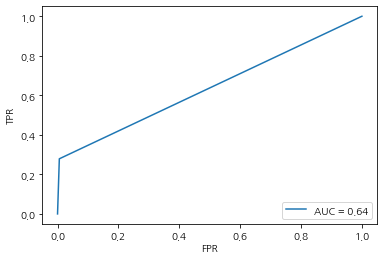

In [156]:
plt.plot(fpr,tpr,label="AUC = %0.2f"%roc_auc)
plt.legend(loc='lower right')
plt.ylabel("TPR"); plt.xlabel("FPR")
plt.show()

In [157]:
#f1 스코어
model_f1_score.append(f1_score(df_test_y, y_pred))
model_precision_score.append(precision_score(df_test_y, y_pred))
model_recall_score.append(recall_score(df_test_y, y_pred))

In [158]:
# RandomForest
rf_final = RandomForestClassifier(n_estimators=50,max_depth=8, min_samples_split=20,
                                   min_samples_leaf=10, random_state=1234)
rf_final.fit(df_train_x, df_train_y)

y_pred = rf_final.predict(df_test_x)

print("="*5, "Random Forest", "="*5)
print("Accuracy on training set : {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

print("Confusion matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)))

train_accuracy.append(tree_final.score(df_train_x, df_train_y))
test_accuracy.append(tree_final.score(df_test_x, df_test_y))

fpr, tpr, thresholds =roc_curve(df_test_y, y_pred)
roc_auc=auc(fpr, tpr)

model_auc_score.append(roc_auc)

===== Random Forest =====
Accuracy on training set : 0.933
Accuracy on test set : 0.930
Confusion matrix : 
[[1021    0]
 [  79   25]]


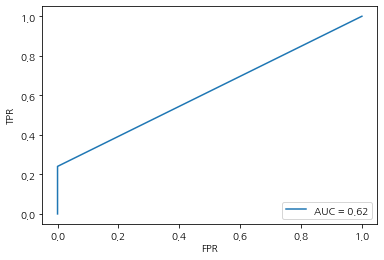

In [159]:
plt.plot(fpr,tpr,label="AUC = %0.2f"%roc_auc)
plt.legend(loc='lower right')
plt.ylabel("TPR"); plt.xlabel("FPR")
plt.show()

In [160]:
#f1 스코어
model_f1_score.append(f1_score(df_test_y, y_pred))
model_precision_score.append(precision_score(df_test_y, y_pred))
model_recall_score.append(recall_score(df_test_y, y_pred))

In [161]:
# Gradient Boosting
gb_final = GradientBoostingClassifier(learning_rate=0.21, n_estimators=100,max_depth=3, min_samples_split=20,
                                   min_samples_leaf=100, random_state=1234)
gb_final.fit(df_train_x, df_train_y)

y_pred = rf_final.predict(df_test_x)

print("="*5, "Random Forest", "="*5)
print("Accuracy on training set : {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

print("Confusion matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)))

train_accuracy.append(tree_final.score(df_train_x, df_train_y))
test_accuracy.append(tree_final.score(df_test_x, df_test_y))

fpr, tpr, thresholds =roc_curve(df_test_y, y_pred)
roc_auc=auc(fpr, tpr)

model_auc_score.append(roc_auc)

===== Random Forest =====
Accuracy on training set : 0.959
Accuracy on test set : 0.940
Confusion matrix : 
[[1021    0]
 [  79   25]]


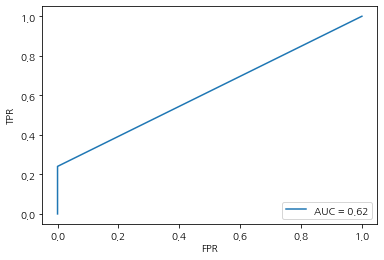

In [162]:
plt.plot(fpr,tpr,label="AUC = %0.2f"%roc_auc)
plt.legend(loc='lower right')
plt.ylabel("TPR"); plt.xlabel("FPR")
plt.show()

In [163]:
#f1 스코어
model_f1_score.append(f1_score(df_test_y, y_pred))
model_precision_score.append(precision_score(df_test_y, y_pred))
model_recall_score.append(recall_score(df_test_y, y_pred))

In [164]:
df_eval = pd.DataFrame(index=model)
df_eval['Train Accuracy']=train_accuracy
df_eval['Test Accuracy']=test_accuracy
df_eval['F1 Score']=model_f1_score
df_eval['AUC']=model_auc_score
df_eval['Precision Score']=model_precision_score
df_eval['Recall Score']=model_recall_score
df_eval.round(3)

,Train Accuracy,Test Accuracy,F1 Score,AUC,Precision Score,Recall Score
DecisionTree,0.936,0.928,0.417,0.636,0.829,0.279
RandomForest,0.936,0.928,0.388,0.620,1.000,0.240
GradientBoosing,0.936,0.928,0.388,0.620,1.000,0.240


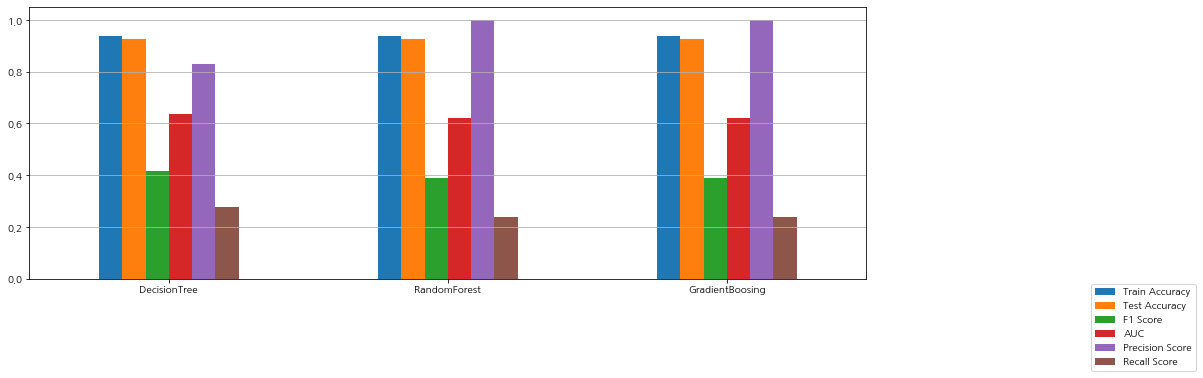

In [180]:
df_eval.plot.bar(rot=0, figsize=(15,5))
plt.legend(loc='best', bbox_to_anchor=(1.4,0))
plt.grid(axis='y')
